# CHURN PREDICTION - TOP BANK COMPANY

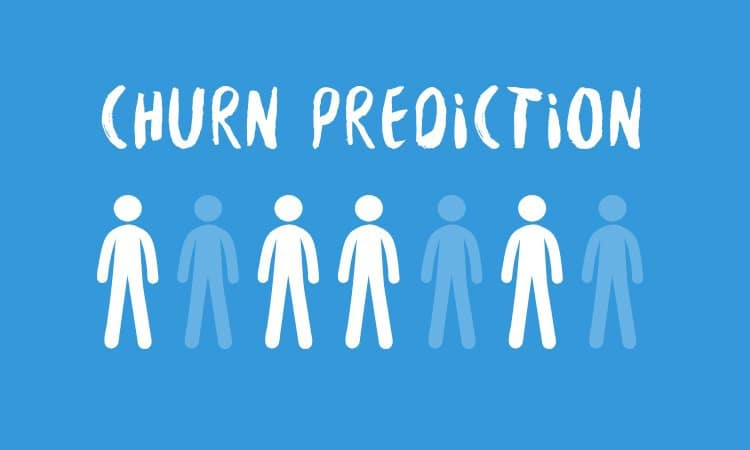

In [2]:
Image('img/capa.jpg')

While getting new customers is an obvious win, many businesses often forget about an important, and potentially bigger win: keeping the customers you already have.

Customer churn – the loss of customers – is a big business killer. Even small increases in churn can cut your revenues in half. There’s no question about it: churn can crush your business, if you let it.

##  **The Four Most Common Causes of Customer Churn**

### 1) Bad Customer Service

Many companies think of customer service as a cost to be minimized, rather than an investment to be maximized. Here’s the issue with that: if you think of support as a cost center, then it will be. That is, if you don’t prioritize support and work to deliver excellent service to your customers, then it’s only going to cost you money…and customers.

In fact, one Oracle study found that almost 9 in 10 customers have abandoned a business because of a poor experience. But just as bad customer service can be a huge loss for your business, the same study found that great customer service can be a huge win, with 86% of customers willing to pay more for a better customer experience.

### 2) Bad Onboarding

To your business, two of the most important milestones in the life of a customer are:

- The moment they sign up for your product, and…
- The moment they achieve their first “success” with your product

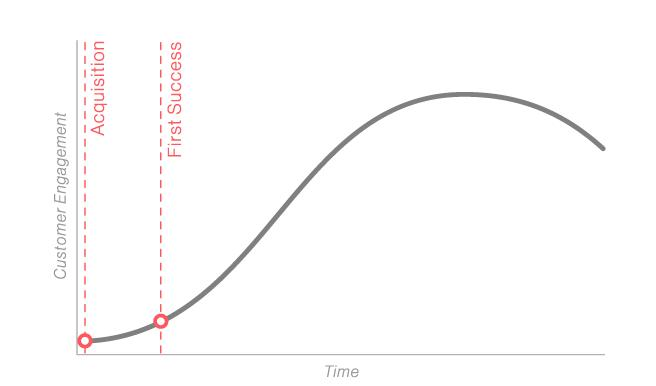

In [9]:
Image("img/bad_unboarding.jpg")

A disproportionate amount of your customer churn will take place between (1) and (2).

That’s where customers abandon your product because they get lost, don’t understand something, don’t get value from the product, or simply lose interest.

Bad onboarding – the process by which you help a customer go from (1) to (2) – can crush your retention rate, and undo all of that hard work you did to get your customers to convert in the first place.

It’s your job to make that transition as fast and smooth as possible for your customer, and that’s where great onboarding comes in.

### 3) Lack of Ongoing Customer Success

While onboarding gets your customer to their initial success, your job isn’t done there.

Hundreds of variables – including changing needs, confusion about new features and product updates, extended absences from the product and competitor marketing – could lead your customers away.

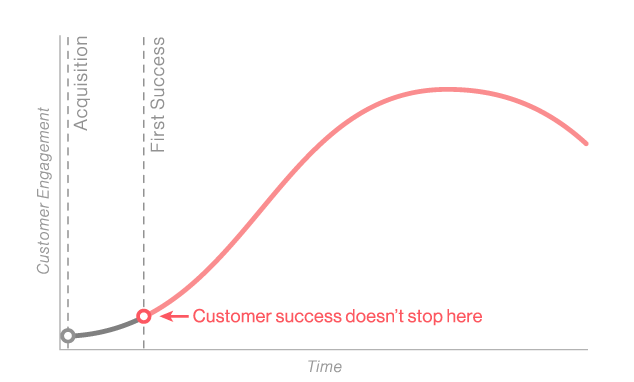

In [11]:
Image("img/3.png")

If your customers stop hearing from you, and you stop helping them get value from your product throughout their entire lifecycle, then you risk making that lifecycle much, much shorter.

### 4) Natural Causes

Not every customer that abandons you does so because you failed.

Sometimes, customers go out of business.

Sometimes, operational or staff changes lead to vendor switches.

Sometimes, they simply outgrow your product or service.

And that’s okay. It’ll happen to every business.

But it’s still churn, and you can get value from acting on it.


**REFERENCES** https://www.groovehq.com/blog/reduce-customer-churn

## Business Problem

TopBank is a large banking services company. It operates mainly in European countries offering financial products, from bank accounts to investments, including some types of insurance and investment products.

The company's business model is a service type, that is, it sells banking services to its customers through physical branches and an online portal.

The company's main product is a bank account, in which the customer can deposit his salary, make withdrawals, deposits and transfer to other accounts. This bank account has no cost to the customer and is valid for 12 months, that is, the customer needs to renew the contract of that account to continue using it for the next 12 months.

According to the TopBank Analytics team, each customer who has this bank account returns a monetary value of 15 % of the value of their estimated salary, if it is less than the average and 20 % if this salary is higher than the average, during the current period of your account. This value is calculated annually.

For example, if a customer's monthly salary is R $ 1,000.00 and the average of all bank wages is R $ 800. The company, therefore, invoices R $ 200 annually with this client. If this customer has been in the bank for 10 years, the company has already earned R $ 2,000.00 from its transactions and account usage.

In recent months, the Analytics team realized that the rate of customers canceling their accounts and leaving the bank, reached unprecedented numbers in the company. Concerned about the increase in this rate, the team devised an action plan to reduce the rate of customer evasion.

Concerned about the drop in this metric, TopBottom's Analytics team hired you as a Data Science consultant to create an action plan, with the objective of reducing customer evasion, that is, preventing the customer from canceling his contract and not renew it for another 12 months. This evasion, in business metrics, is known as Churn.

In general, Churn is a metric that indicates the number of customers who have canceled the contract or have stopped buying your product within a certain period of time. For example, customers who canceled the service contract or after it expired, did not renew it, they are considered churn customers.

Another example would be customers who have not made a purchase for more than 60 days. These customers can be considered churn customers until a purchase is made. The 60-day period is completely arbitrary and varies between companies.

We were hired as a Data Science Consultant to create a high performance model for identifying churn customers.

At the end of your consultancy, you need to deliver to the TopBank CEO a model in production, which will receive a customer base via API and develop this base "scorada", that is, one more column with the probability of each customer going into churn .

In addition, you will need to deliver a report reporting your model's performance and results in relation to

- What is TopBank's current Churn rate? How does it vary monthly?
- What is the model's performance in classifying customers as churns?
- What is the expected return, in terms of revenue, if the company uses its model to avoid churn from customers?

A possible action to prevent the customer from churning is to offer a discount coupon, or some other financial incentive for him to renew his contract for another 12 months.

Which customers would you give the financial incentive to and what would that amount be, in order to maximize ROI (Return on Investment). Recalling that the sum of incentives for each client cannot exceed R $ 10,000.00

# 0.0. IMPORTS 

In [54]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data preparation
from sklearn.model_selection import train_test_split

#machine learning algorithms
from sklearn.linear_model import LogisticRegression

#metrics
from sklearn.metrics import accuracy_score, classification_report,cohen_kappa_score,recall_score,f1_score,roc_auc_score, plot_precision_recall_curve, precision_score,roc_curve
from scikitplot              import metrics      as mt

#auxiliar packages
from IPython.display         import Image
from IPython.core.display    import HTML
import inflection
import warnings
import random
warnings.filterwarnings('ignore')

## 0.1. Helper Functions

In [80]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 30]
    plt.rcParams['font.size'] = 25
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [81]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

The data set that will be used to create the solution for TopBottom, is available on the Kaggle platform. This is the link: [ChurnDataset]("https://www.kaggle.com/mervetorkan/churndataset")

Each row represents a customer and each column contains some attributes that describe that customer. The data set includes information about:

- **RowNumber**: The column number
- **CustomerID**: Unique customer identifier
- **Surname**: Last name of the customer.
- **CreditScore**: The customer's Credit score for the consumer market.
- **Geography**: The state where the customer resides.
- **Gender**: The gender of the customer.
- **Age**: The age of the customer.
- **Tenure**: Number of months that the customer has remained active.
- **Balance**: The amount spent by the customer with the company TopBottom.
- **NumOfProducts**: The number of products purchased by the customer.
- **HasCrCard**: Flag indicating whether the customer has a credit card or not.
- **IsActiveMember**: Flag indicating whether the customer still has an active registration at TopBottom.
- **EstimateSalary**: Estimated monthly salary of the client.
- **Exited**: Flag indicating whether or not the customer is in Churn

In [4]:
#load data as a dataframe
df_raw = pd.read_csv("data/churn.csv")

# 1.0. DATA DESCRIPTION

In [5]:
#copy data
df1 = df_raw.copy()

## 1.1. Rename Columns

In [6]:
cols_old = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']

#apply snakecase
snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

#rename columns
df1.columns = cols_new

In [7]:
df1.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 1.2. Data Dimensions

In [8]:
#print shape
print("Number of rows: {}".format(df1.shape[0]))
print("Number of columns: {}".format(df1.shape[1]))

Number of rows: 10000
Number of columns: 14


## 1.3. Data Types

In [9]:
#check data types
df1.dtypes

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

## 1.4. Check NA

In [10]:
#check if there are null values in our dataframe
df1.isnull().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

## 1.5. Descriptive Statistical

### 1.5.1. Numerical Attributes

In [11]:
#select only numerical features
num_attributes = df1.select_dtypes(include = ['int64','float64'])
num_attributes.drop(columns = ['row_number','customer_id','is_active_member','has_cr_card','exited'], axis = 1, inplace = True)

In [12]:
#central tendency - mean and median
ct1 = pd.DataFrame(np.round(num_attributes.apply(np.mean),2)).T
ct2 = pd.DataFrame(np.round(num_attributes.apply(np.median),2)).T

#dipersion - std, max, min, range, skew, kurtosis
d1 = pd.DataFrame(np.round(num_attributes.apply(np.std))).T
d2 = pd.DataFrame(np.round(num_attributes.apply(min))).T
d3 = pd.DataFrame(np.round(num_attributes.apply(max))).T
d4 = pd.DataFrame(np.round(num_attributes.apply(lambda x: x.max() - x.min()))).T
d5 = pd.DataFrame(np.round(num_attributes.apply(lambda x: x.skew()),2)).T
d6 = pd.DataFrame(np.round(num_attributes.apply(lambda x: x.kurtosis()),2)).T

#concat numerical attributes
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,credit_score,350.0,850.0,500.0,650.53,652.00,97.0,-0.07,-0.43
1,age,18.0,92.0,74.0,38.92,37.00,10.0,1.01,1.40
2,tenure,0.0,10.0,10.0,5.01,5.00,3.0,0.01,-1.17
3,balance,0.0,250898.0,250898.0,76485.89,97198.54,62394.0,-0.14,-1.49
4,num_of_products,1.0,4.0,3.0,1.53,1.00,1.0,0.75,0.58
5,estimated_salary,12.0,199992.0,199981.0,100090.24,100193.92,57508.0,0.00,-1.18


<AxesSubplot:xlabel='estimated_salary', ylabel='Density'>

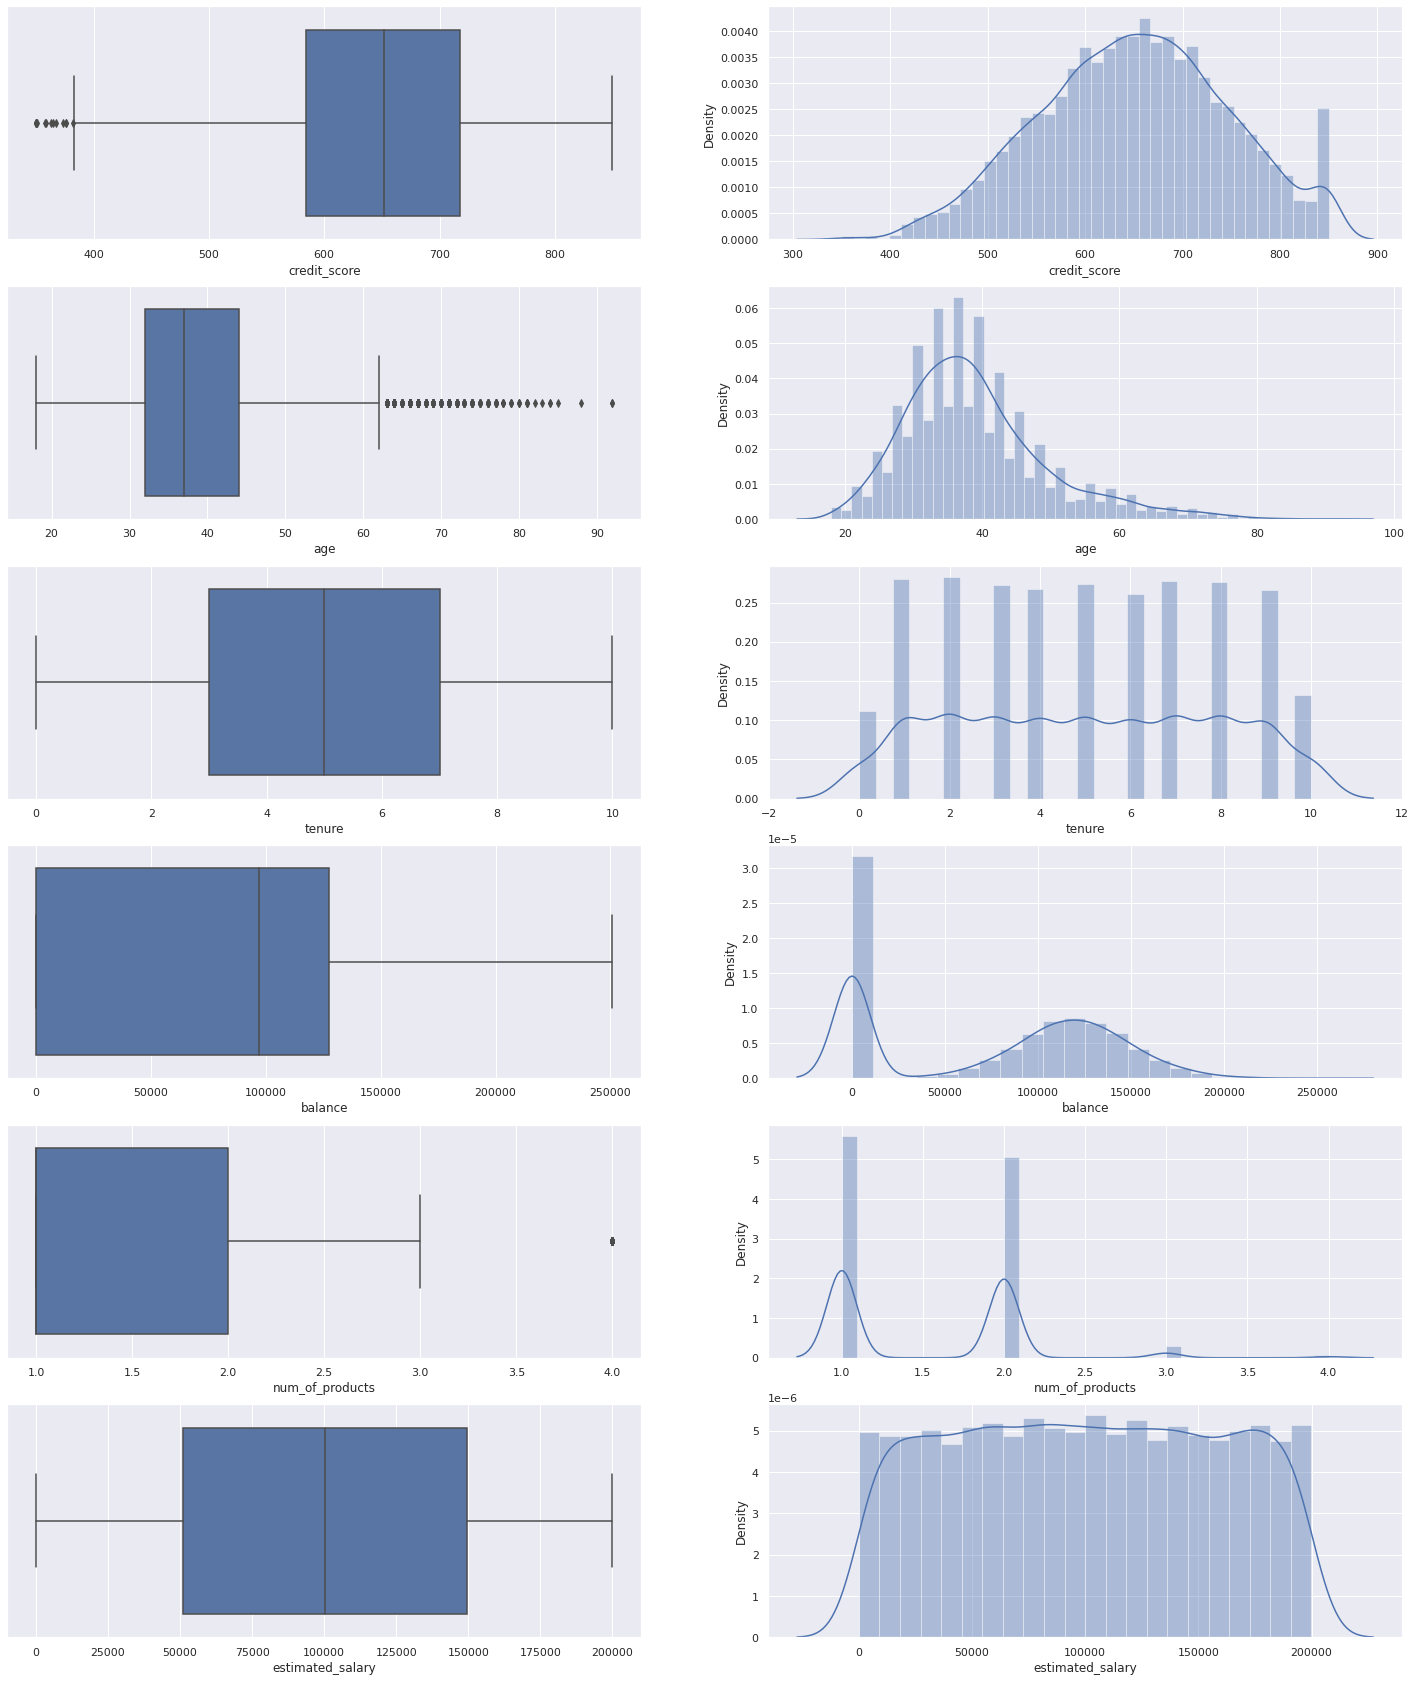

In [13]:
#plot each graphic to visualize if there are outliers

plt.subplot(6,2,1)
sns.boxplot(df1['credit_score'])

plt.subplot(6,2,2)
sns.distplot(df1['credit_score'])

plt.subplot(6,2,3)
sns.boxplot(df1['age'])

plt.subplot(6,2,4)
sns.distplot(df1['age'])

plt.subplot(6,2,5)
sns.boxplot(df1['tenure'])

plt.subplot(6,2,6)
sns.distplot(df1['tenure'])

plt.subplot(6,2,7)
sns.boxplot(df1['balance'])

plt.subplot(6,2,8)
sns.distplot(df1['balance'])

plt.subplot(6,2,9)
sns.boxplot(df1['num_of_products'])

plt.subplot(6,2,10)
sns.distplot(df1['num_of_products'])

plt.subplot(6,2,11)
sns.boxplot(df1['estimated_salary'])

plt.subplot(6,2,12)
sns.distplot(df1['estimated_salary'])

### 1.5.2. Categorical and Binary Attributes

In [14]:
#select only categorical features and binary features
categorical_features = ['geography','gender','has_cr_card','is_active_member','exited']
cat_attributes = df1[categorical_features]
cat_attributes.head()

,geography,gender,has_cr_card,is_active_member,exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


<AxesSubplot:xlabel='exited', ylabel='count'>

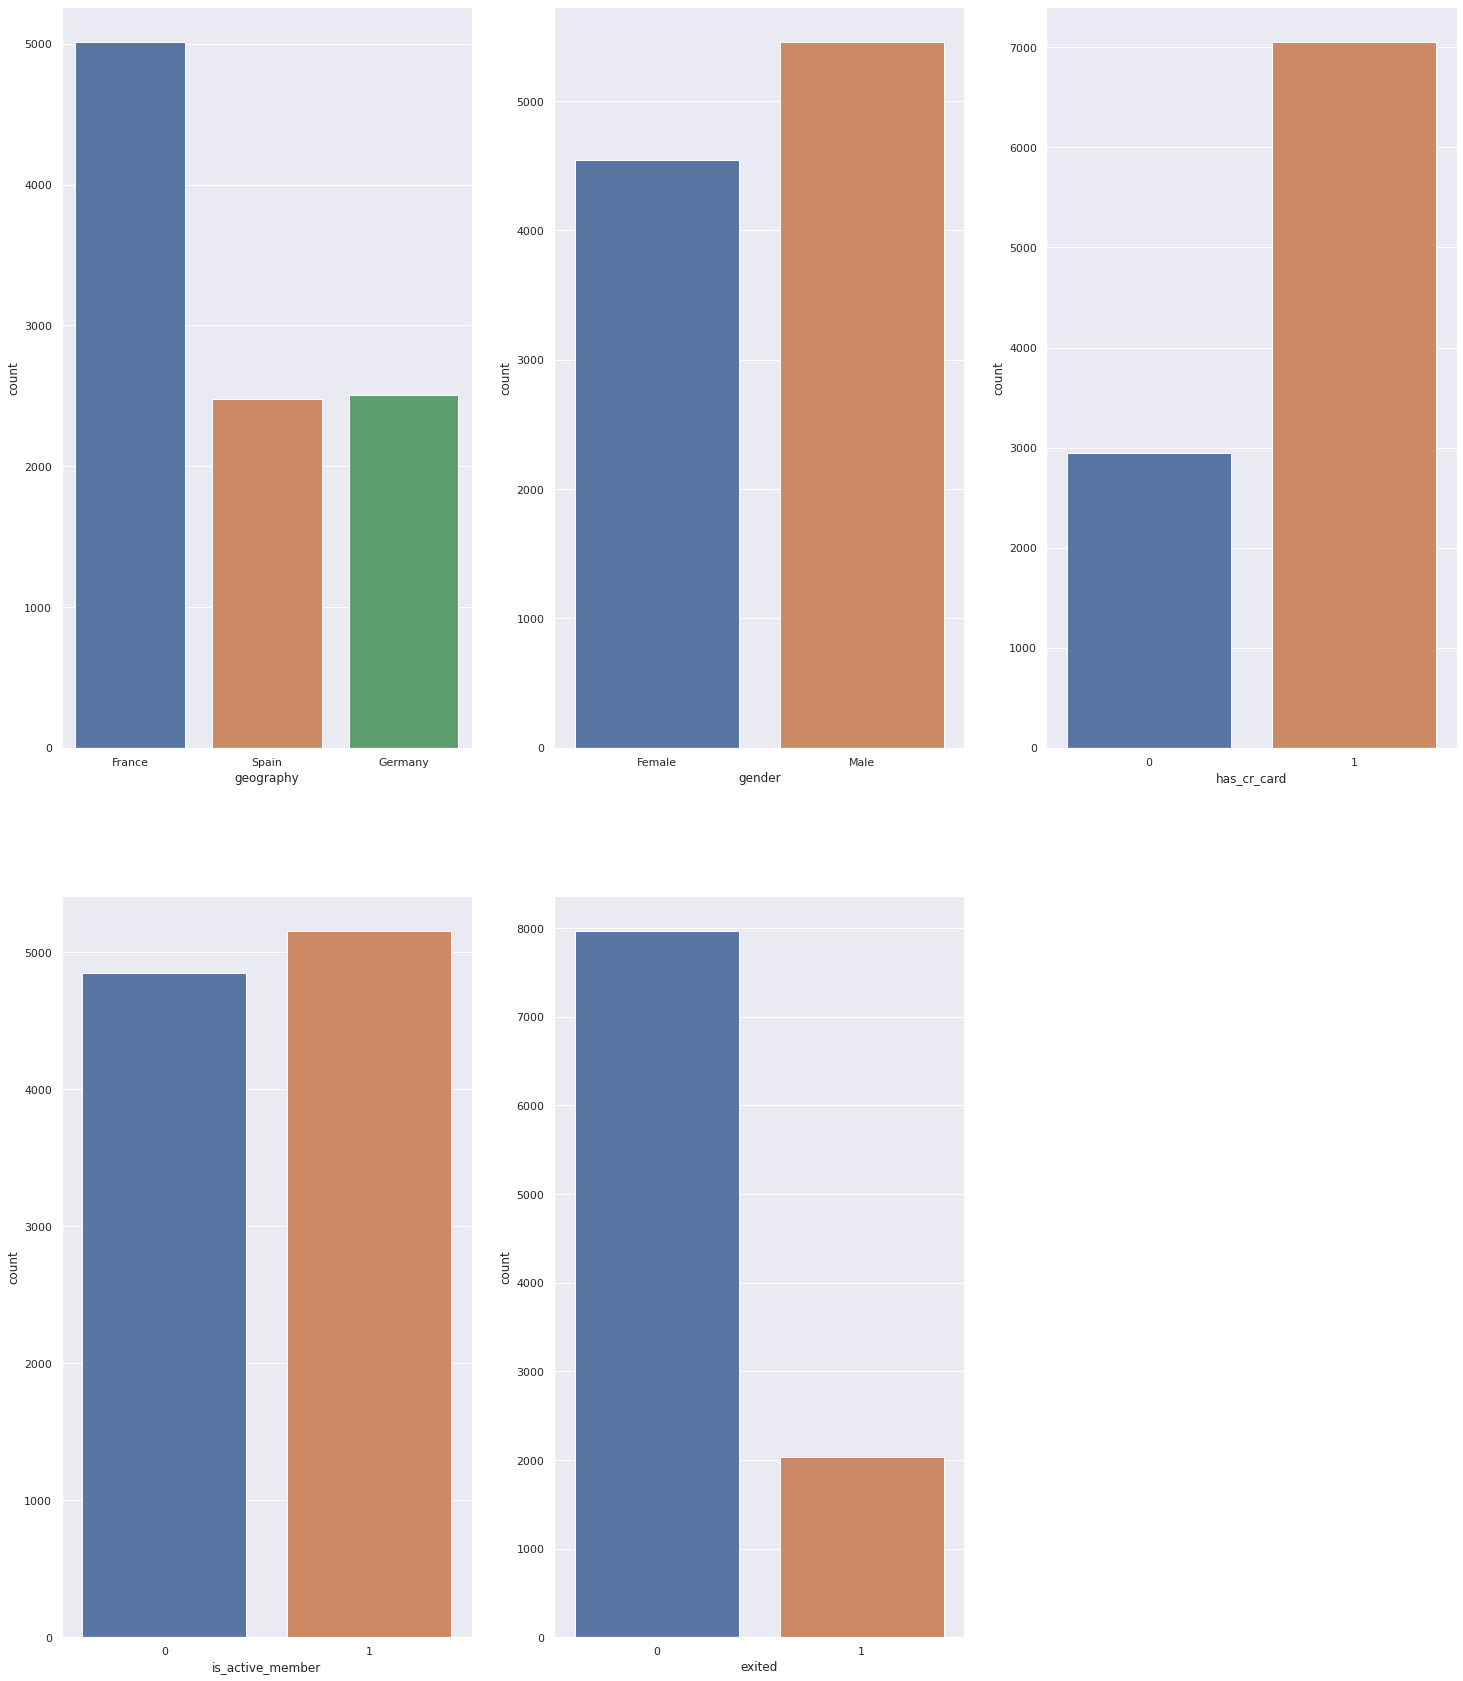

In [15]:
#plot each graphic to our categorical variables
plt.subplot(2,3,1)
sns.countplot(cat_attributes['geography'])

plt.subplot(2,3,2)
sns.countplot(cat_attributes['gender'])

plt.subplot(2,3,3)
sns.countplot(cat_attributes['has_cr_card'])

plt.subplot(2,3,4)
sns.countplot(cat_attributes['is_active_member'])

plt.subplot(2,3,5)
sns.countplot(cat_attributes['exited'])

# 2.0. FEATURE ENGINEERING

In [16]:
df2 = df1.copy()

In [17]:
df2.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2.1. MindMap Hypothesis

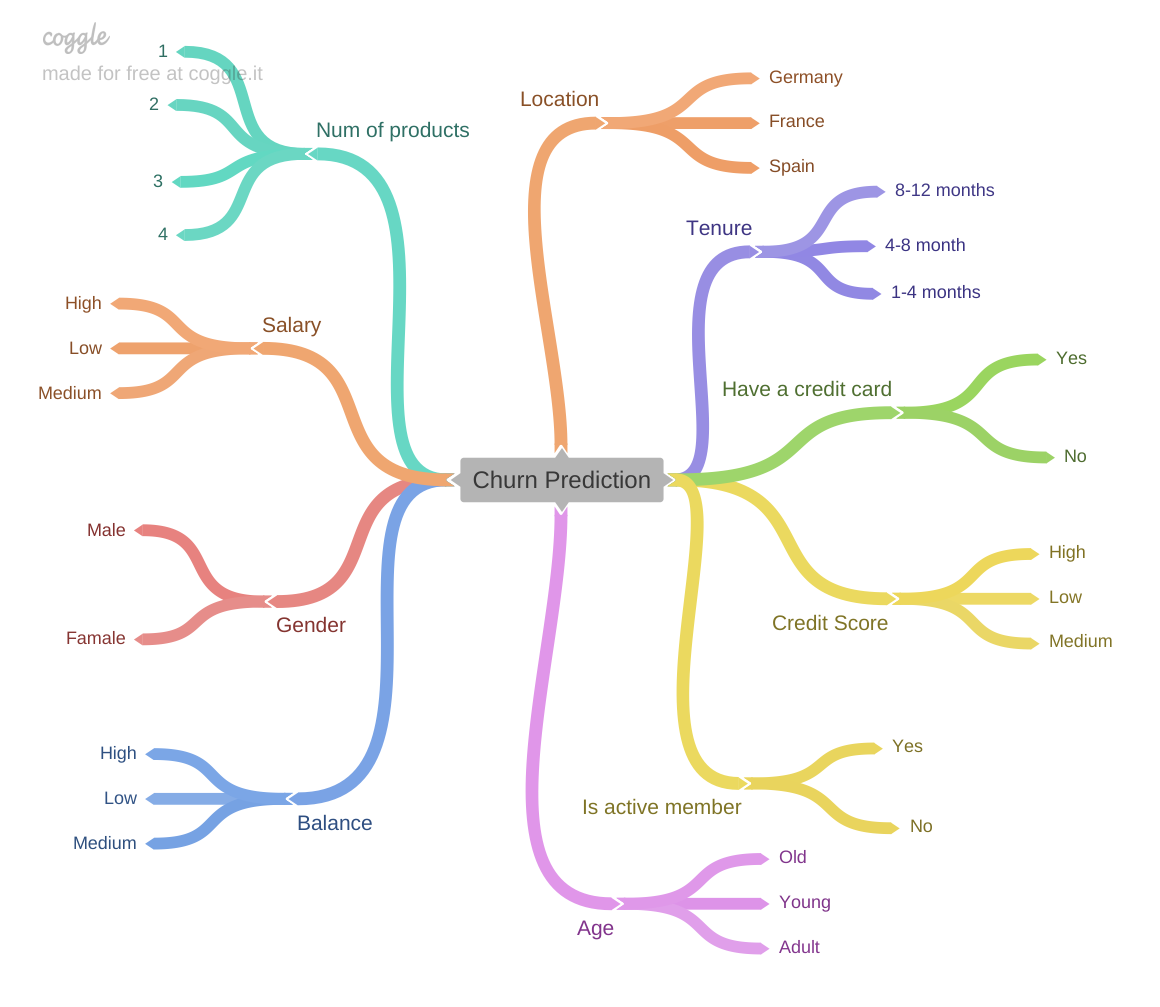

In [18]:
Image("img/mindmap.png")

## 2.2. Hypothesis List

### Age
    - Among the people who are in churn, the elderly are the majority.
    - Young people have less credit on the card
    - There are young people more active than older.
    
### Balance
    - People who spend more are not churning.
    
### Is Active Member
    - There are young people more active than older.
    - Active customers spend more.
    - The higher the salary, the greater the probability of staying
    - People with a credit card are more active.
    - People who buy multiple products are more active.
    
### Salary
    - The higher the salary, the greater the probability of staying
    - The lower the salary, the greater the debt on the card
    - The lower the salary, the lower the credit.
    - Young people have a lower salary.
    - The lower the salary, the greater the chance of churning
    
### Gender
    - Gender does not influence the likelihood that someone will churn.
    
### Have a credit card
    - People with higher expenses have a credit card.
    - People with debt cards are less active.
    
### Num of products
    - The greater the quantity of products purchased, the less chance of churning
    - People with a higher salary buy more products
### Location
    - The country does not influence the likelihood of the customer churning
### Tenure
    - The longer the customer remained active, the less chance of churning.

## 2.3. Final Hypothesis List

**H1** Among the people who are in churn, the elderly are the majority.

**H2** Young people have less credit on the card

**H3** There are young people more active than older.

**H4** People who spend more are not churning.

**H5** There are young people more active than older.

**H6** Active customers spend more.

**H7** The higher the salary, the greater the probability of staying

**H8** People with a credit card are more active.

**H9** People who buy multiple products are more active.

**H10** The lower the salary, the greater the debt on the card

**H11** The lower the salary, the lower the credit.

**H12** Young people have a lower salary.

**H13** The lower the salary, the greater the chance of churning

**H14** Gender does not influence the likelihood that someone will churn.

**H15** People with higher expenses have a credit card.

**H16** People with debt cards are less active.

**H17** The greater the quantity of products purchased, the less chance of churning

**H18** People with a higher salary buy more products

**H19** The country does not influence the likelihood of the customer churning

**H20** The longer the customer remained active, the less chance of churning.

## 2.4. Feature Engineering

In [76]:
#age_rate
df2['age_rate'] = df2['age'].apply(lambda x: "Young" if (x >= 18) & (x <= 24) else "Adult" if (x > 24) & (x < 60) else "Old")

#salary
df2['salary_rate'] = df2['estimated_salary'].apply(lambda x: "Below Average" if x < 100000 else "Above average salary" if (x > 100000) & (x < 150000) else 'Above average salary')

# 4.0. EXPLORATORY DATA ANALYSIS

In [78]:
df4 = df2.copy()

## 4.1. Univariate Analysis

### 4.1.1. Response Variable

<AxesSubplot:xlabel='exited', ylabel='count'>

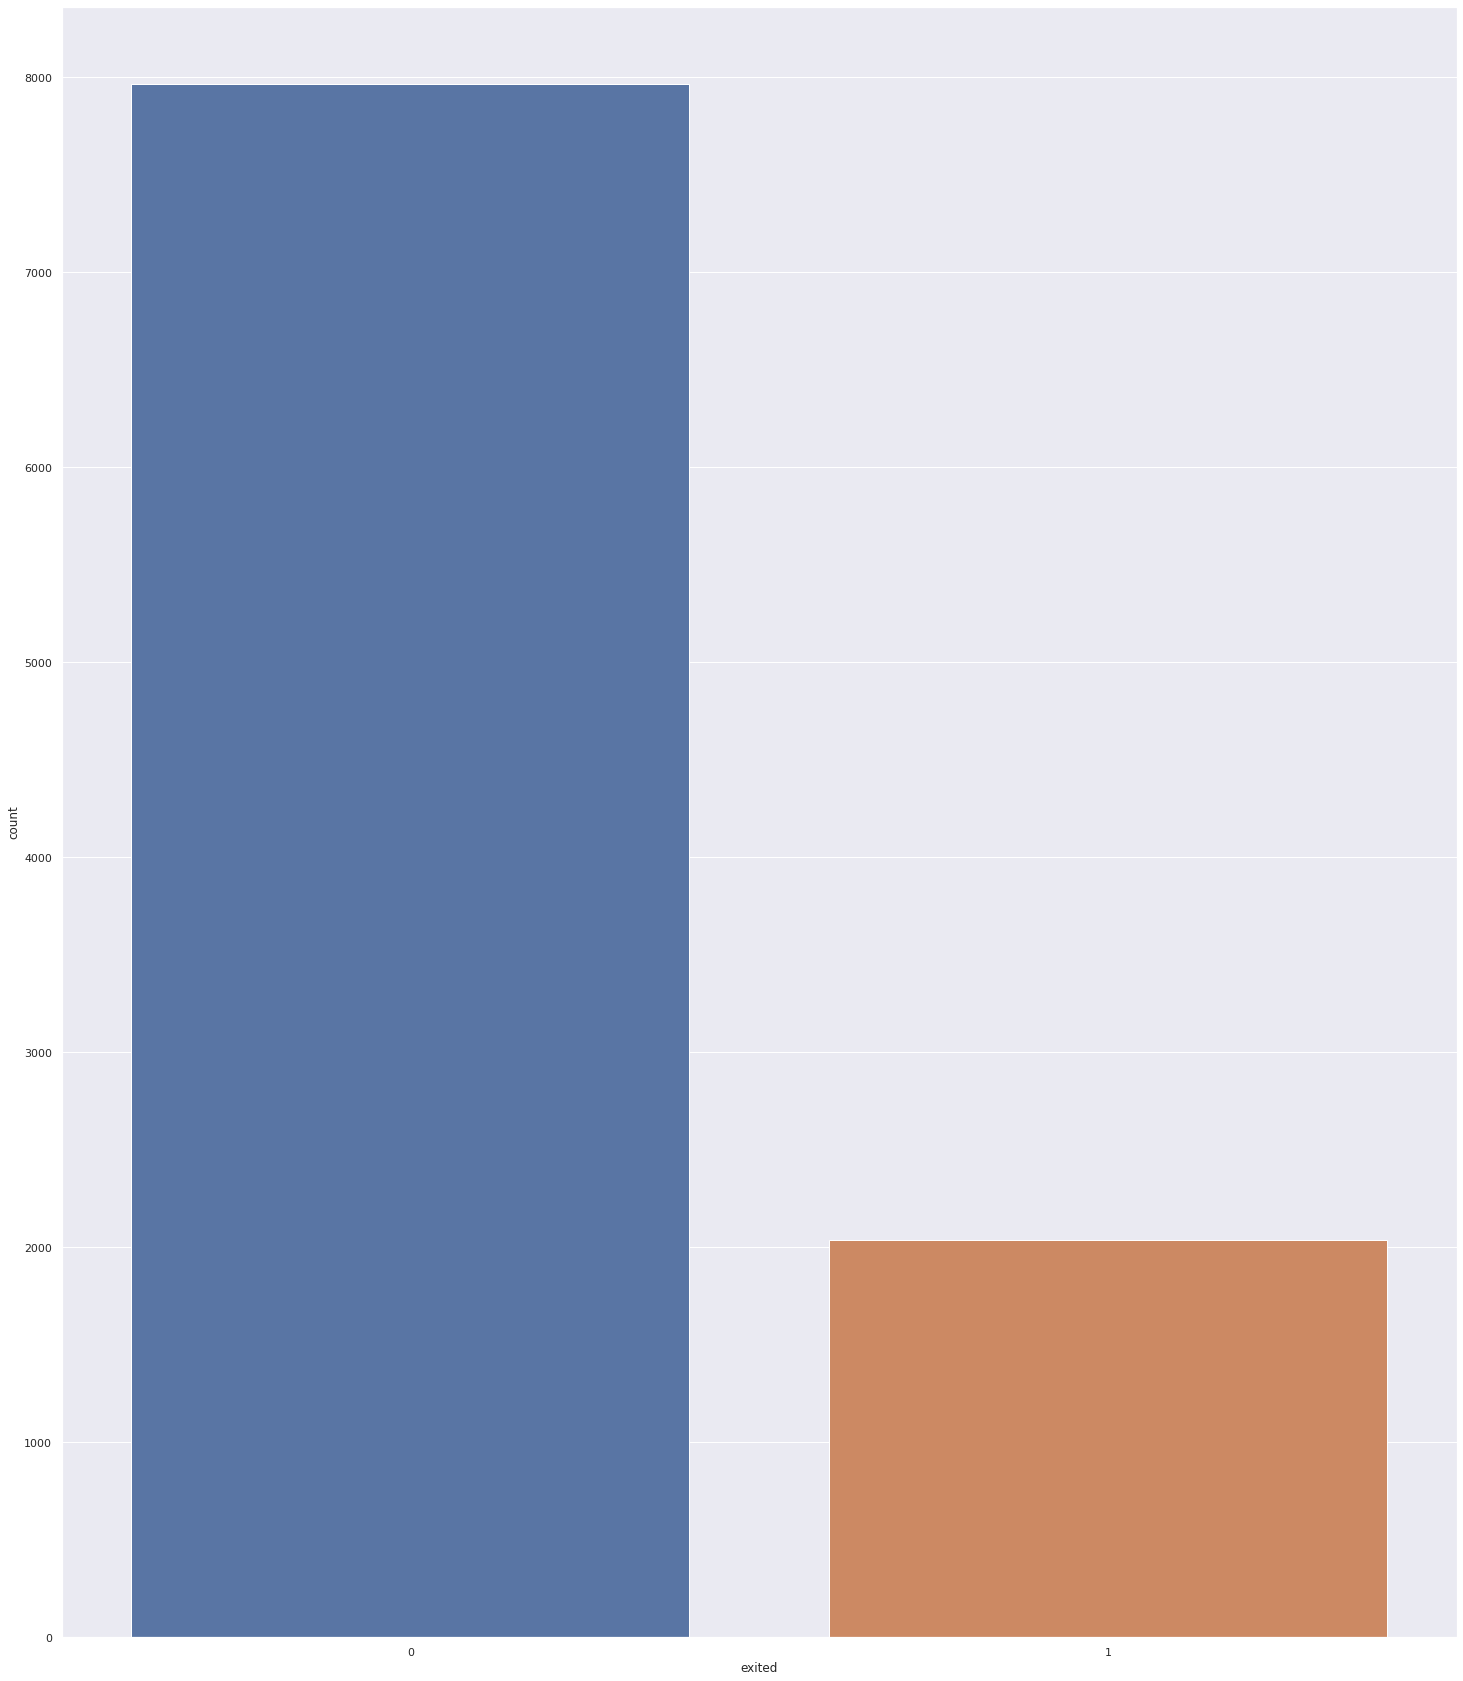

In [82]:
sns.countplot(df4['exited'])

### 4.1.2. Numerical Variables

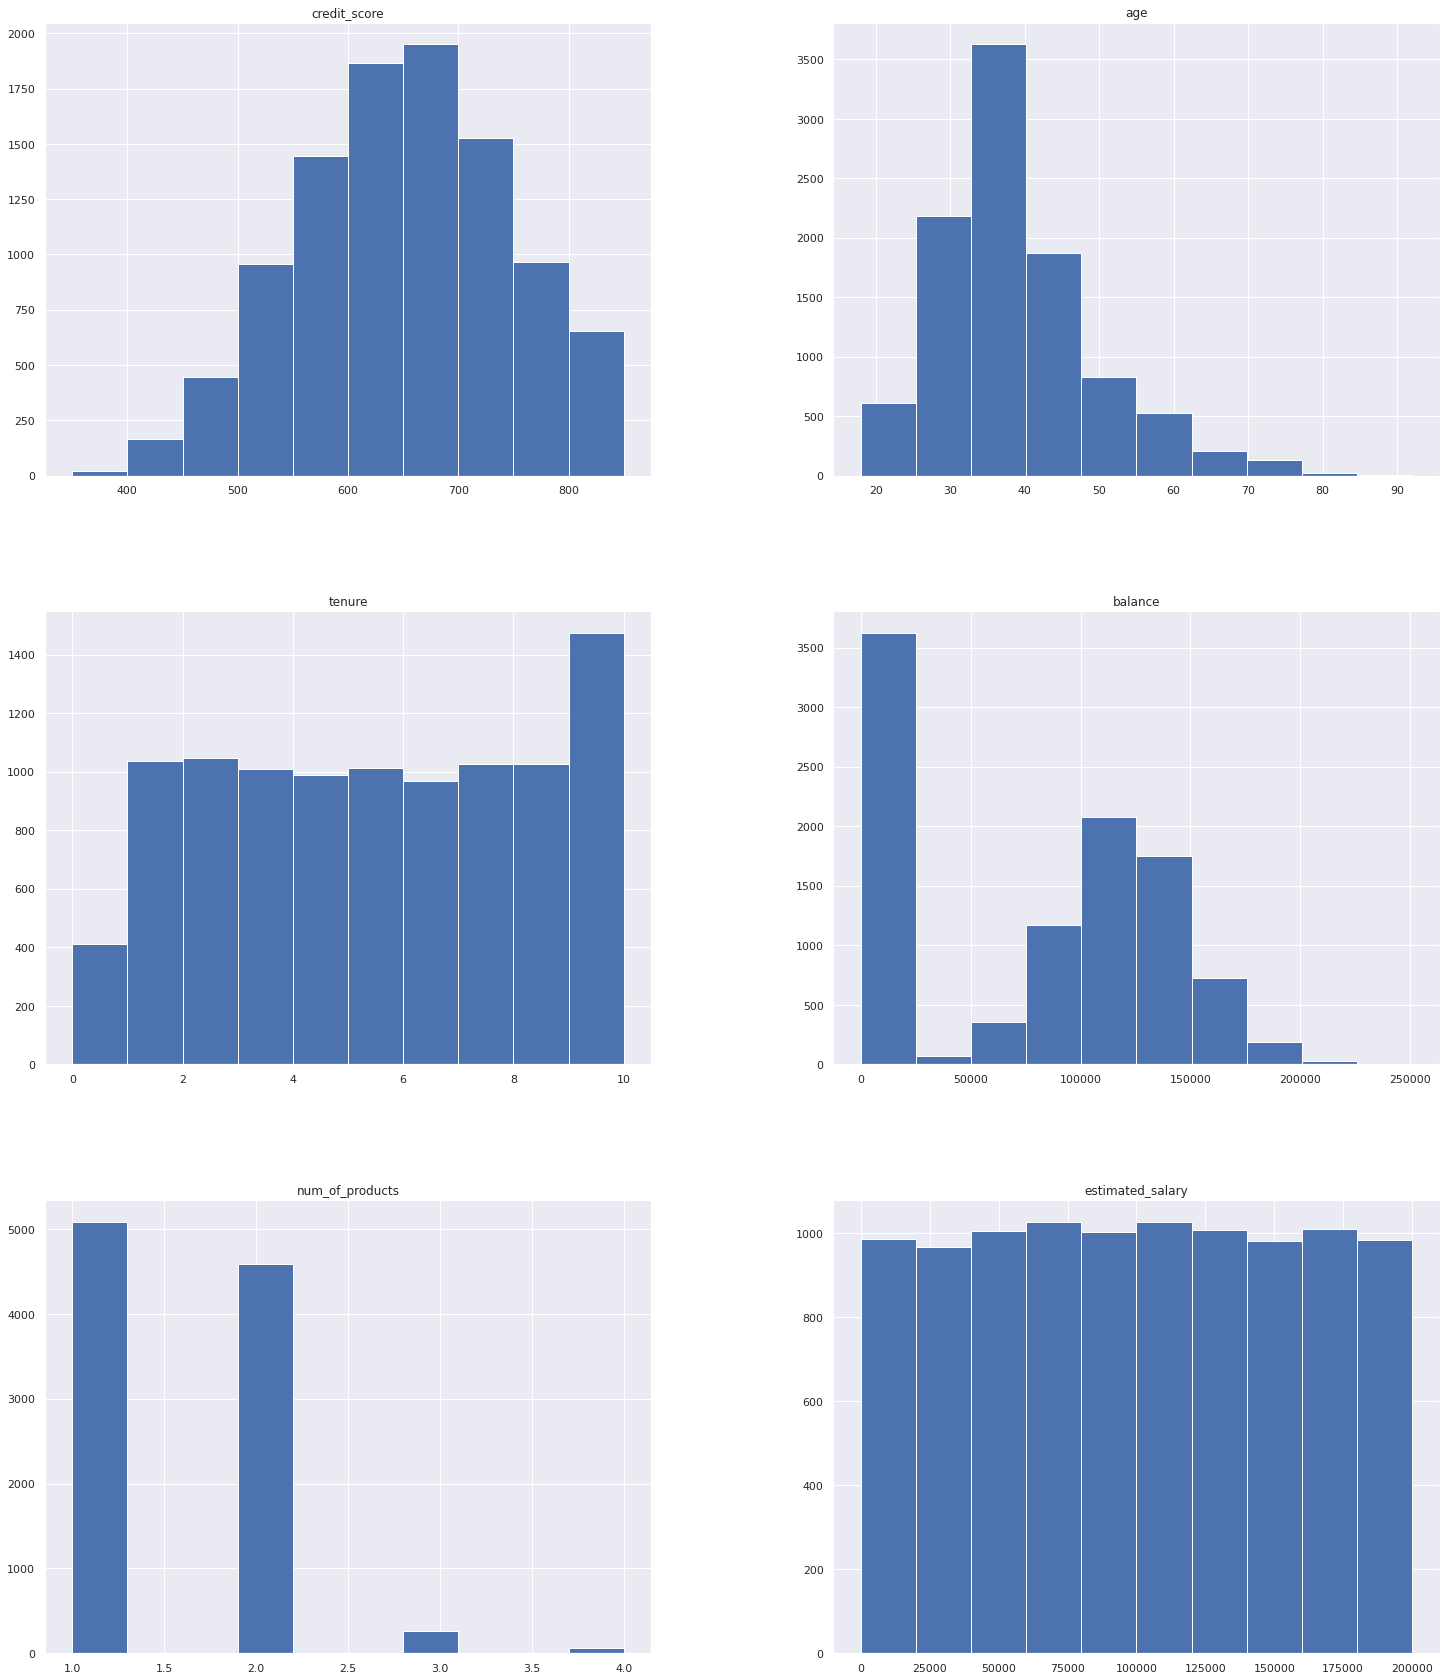

In [86]:
num_attributes = df4.select_dtypes(include = ['int64','float64'])
num_attributes.drop(columns = ['row_number','customer_id','has_cr_card','is_active_member','exited'], axis = 1, inplace = True)
num_attributes.hist();

### 4.1.3. Categorical Variables

## 4.2. Bivariate Analysis

## 4.3. Multivariate Analysis

# 3.0. DATA PREPARATION

In [20]:
df3 = df2.copy()

## 3.1. Split data into training and test 

In [56]:
X = df3.drop(columns = 'exited', axis = 1)
y = df3['exited']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# 4.0. FEATURE SELECTION

## 4.1. Manual Feature Selection

In [58]:
cols_selected = ['credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary']

X_train = X_train[cols_selected]
X_test = X_test[cols_selected]

In [63]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# 5.0. MACHINE LEARNING MODELLING

## 5.1. Baseline Model

Accuracy: 0.6835
Kappa Score: -0.01894300357998313
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1607
           1       0.18      0.17      0.18       393

    accuracy                           0.68      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.68      0.68      0.68      2000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

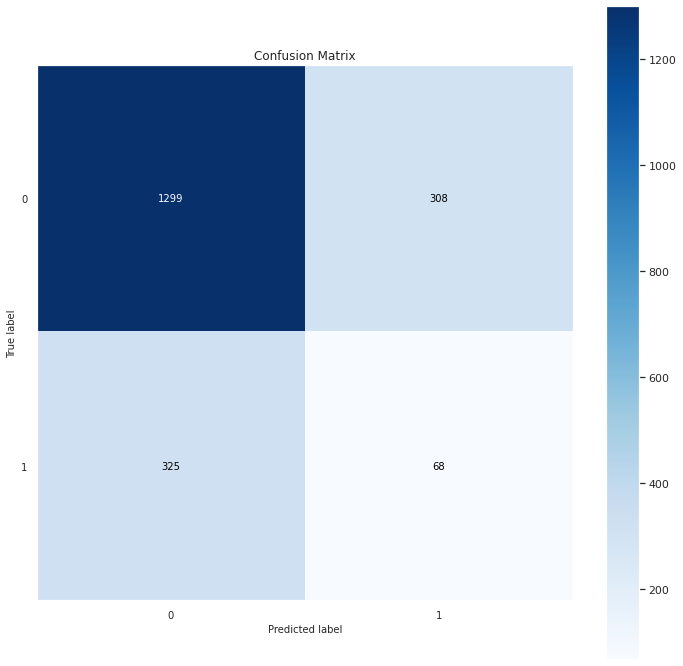

In [59]:
import random
churn = y_test.drop_duplicates().sort_values().tolist()
random_test = X_test.shape[0]
churn_weights = df3['exited'].value_counts( normalize=True ).sort_index().tolist()

# prediction
yhat_random = random.choices( churn, k=random_test,
                              weights=churn_weights )

# Accuracy
acc_random = accuracy_score( y_test, yhat_random )
print( 'Accuracy: {}'.format( acc_random ) )

# Kappa Metrics
kappa_random = cohen_kappa_score( y_test, yhat_random )
print( 'Kappa Score: {}'.format( kappa_random ) )

# Classification report
print( classification_report( y_test, yhat_random ) )

# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat_random, normalize=False, figsize=(12,12))

## 5.2. Logistic Regression

Accuracy: 0.8005
Kappa Score: 0.07345913234904822
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

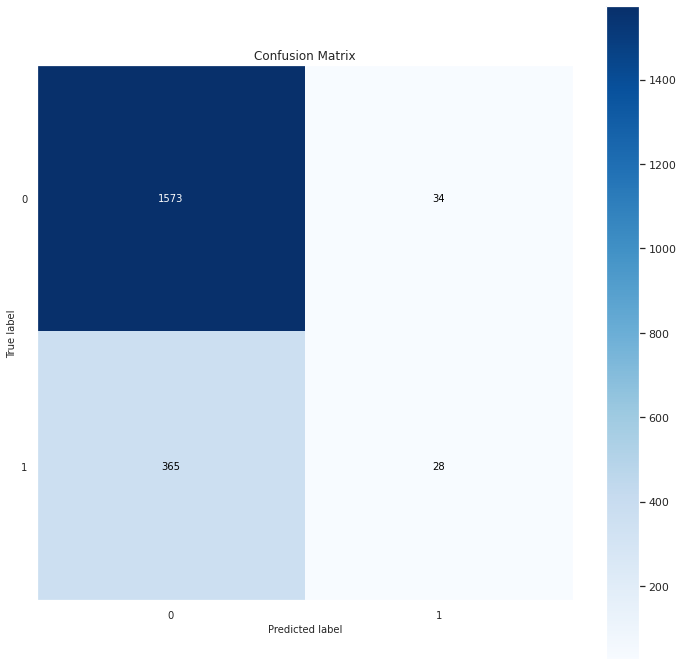

In [64]:
#define model
logreg = LogisticRegression()

#fit model
logreg.fit(X_train,y_train)

#predict model
yhat_logreg = logreg.predict(X_test)

# Accuracy
acc_logreg = accuracy_score( y_test, yhat_logreg )
print( 'Accuracy: {}'.format( acc_logreg ) )

# Kappa Metrics
kappa_logreg = cohen_kappa_score( y_test, yhat_logreg )
print( 'Kappa Score: {}'.format( kappa_logreg ) )

# Classification report
print( classification_report( y_test, yhat_logreg ) )

# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat_logreg, normalize=False, figsize=(12,12))

In [41]:
print( 'Number of Rows: {}'.format( X_train.shape[0] ) )
print( 'Number of Features: {}'.format( X_train.shape[1] ) )
print( 'Number of Classes: {}'.format( y_train.nunique() ) )

Number of Rows: 8000
Number of Features: 13
Number of Classes: 2
